- Prediction: By april 8, number of new cases in Italy will be stagnating

In [1]:
import pandas
import altair as alt
from scipy.optimize import curve_fit
import numpy
import datetime

In [2]:
data = pandas.read_csv("virus.csv")
data['Date'] =  pandas.to_datetime(data['Date'])

In [3]:
(pandas.to_datetime("2020-03-10") - pandas.to_datetime("2020-03-01")).days

9

In [13]:
data = data[['Date', 'Number of cases']].sort_values('Date')
data['Days_since'] = (data['Date'] - pandas.to_datetime("2020-01-31"))
data['Days_since'] = data['Days_since'].apply(lambda x: x.days)
data = data.sort_values('Date')
data['New cases'] = data['Number of cases'].diff()

In [14]:
data

,Date,Number of cases,Days_since,New cases
20,2020-01-31,1,0,NaN
19,2020-02-04,2,4,1.0
18,2020-02-29,3,29,1.0
17,2020-03-04,14,33,11.0
16,2020-03-05,20,34,6.0
15,2020-03-09,43,38,23.0
14,2020-03-11,48,40,5.0
13,2020-03-12,66,41,18.0
12,2020-03-13,79,42,13.0
11,2020-03-14,91,43,12.0


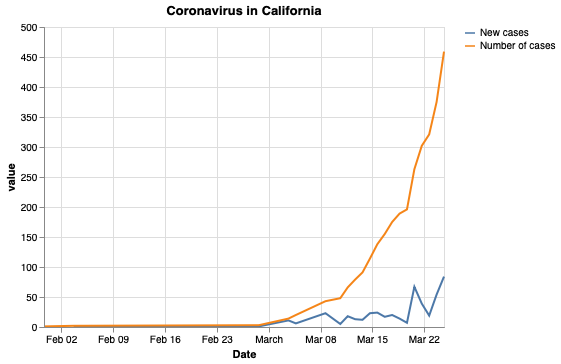

In [18]:
alt.Chart(data[['Date', 'New cases', 'Number of cases']].melt('Date')).mark_line().encode(
    x='Date',
    y='value',
    color=alt.Color('variable', legend=alt.Legend(title=""))
).properties(
    title='Coronavirus in California'
)